**_______________________________________________________________________________________________________________**

### PART 4 : 5 QUBIT CIRCUIT and Z(3)

**_______________________________________________________________________________________________________________**

#### Imports :

In [1]:
# Numpy is used for working with arrays and perform numerical operations
import numpy as np
# Pyplot is used to create graphs
import matplotlib.pyplot as plt
# Plot_histogram is used to visualize the simulation result.
from qiskit.visualization import plot_histogram

# QuantumCircuit is used to create quantum circuits
from qiskit import QuantumCircuit, transpile
# Qiskit_aer library provides backend quantum simulators
from qiskit_aer import Aer

# QiskitRuntimeService class is used to run actual IBM QC hardware
from qiskit_ibm_runtime import QiskitRuntimeService
# SamplerV2 is used to find the probabilities of output states
from qiskit_ibm_runtime import SamplerV2 as Sampler

## Solution to (A) - Input Waveform preparation

#### i) Quantum circuit creation and adding different components:

In [2]:
# Number of qubits 
n_qubits = 5

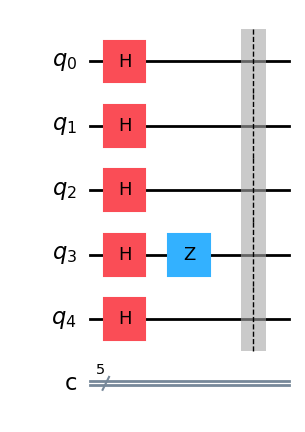

In [3]:
# Creating a Quantum Circuit 
qc = QuantumCircuit(n_qubits,n_qubits)

# Adding H gates
for i in range(n_qubits):
    qc.h(i)

# Applying z gate
qc.z(3)

# Creating barrier
qc.barrier()

# Visualizing the circuit
qc.draw(output='mpl', style='iqp')

***Fig 01 : Quantum circuit with input state***

#### ii) Simulation

In [4]:
# Simulating the state vector
simulator = Aer.get_backend("statevector_simulator")

# Transpile transforms the circuit to something appropriate for the machine
sim_circuit = transpile(qc, backend = simulator)

# The run method in the simulator executes the transpiled circuit.
sim_job = simulator.run(sim_circuit, shots = 4096)

# I am fetching the results of the simulation job execution.
sim_result = sim_job.result()

# Getting the statevector
statevector = sim_result.get_statevector()

#### iii) Fetching the amplitudes and plotting histogram :

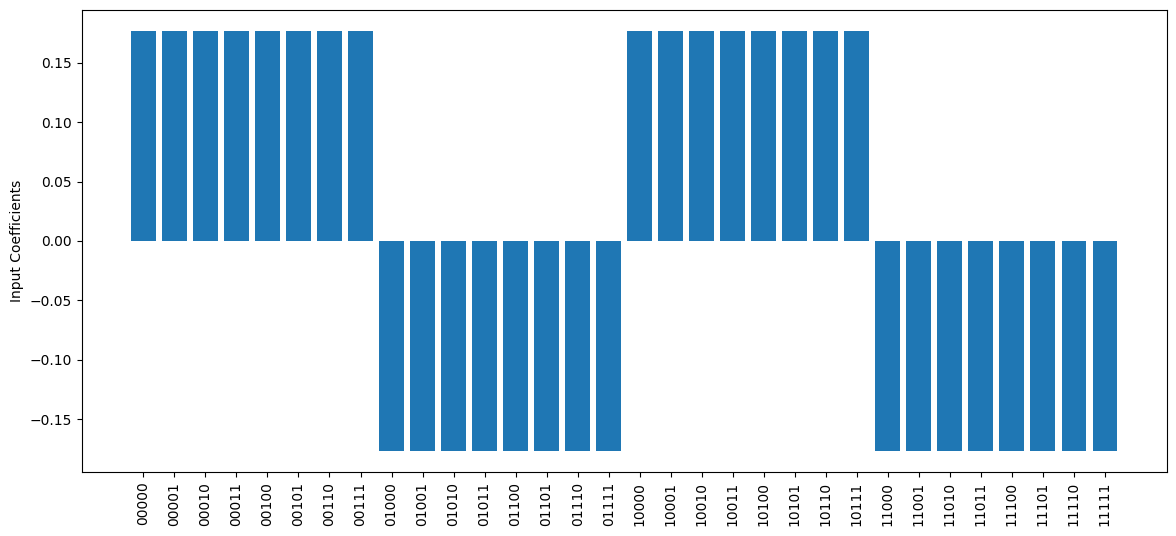

In [5]:
# Getting the amplitudes of statevector
amplitudes = np.real(statevector)   
binaries=[] 

# Generating binary values
for i in range(0,len(amplitudes)): 
    binaries +=['{0:05b}'.format(i)]

# Plotting the input waveform
plt.figure(figsize=(14,6)) 
plt.bar(binaries, amplitudes) 
plt.ylabel('Input Coefficients') 
plt.xticks(rotation=90)
plt.show()

**Fig 02 : The Input Waveform : This is a Square Wave with Period (T) =  16**

#### iv). Frequency analysis

**Harmonics are integer multiples of a fundamental frequency (f1) present in a waveform.**  
- A square wave (generated by Z(k) gates) contains odd harmonics (f1, 3f1, 5f1, …).

For 5 Qubit circuit with Z(3) : 
- Period (T) =  16
- Fundamental frequency (f1) = 2^n / T = 2^5 / 16 = 32 / 16 = 2

In [6]:
period = 4  # From theoretical analysis
frequency = len(binaries)/period
print(f"Expected frequency: {frequency}")

Expected frequency: 8.0


**Expected QFT peak: ∣00010⟩ (binary 2)**

## Solution to (B) - Building QFT Circuit

#### i) Defining function to create QFT :

In [7]:
# Function to create QFT
def qft(qc, n_qubits):
    for i in range(n_qubits-1, -1, -1):
        qc.h(i)
        for j in range(i-1, -1, -1):
            # Controlled phase rotation
            angle = np.pi/(2**(i-j))
            qc.cp(angle, j, i)
        qc.barrier()
    
    # Qubit swaps
    for i in range(n_qubits//2):
        qc.swap(i, n_qubits-1-i)
    qc.barrier()

#### ii) Forming the QFT circuit :

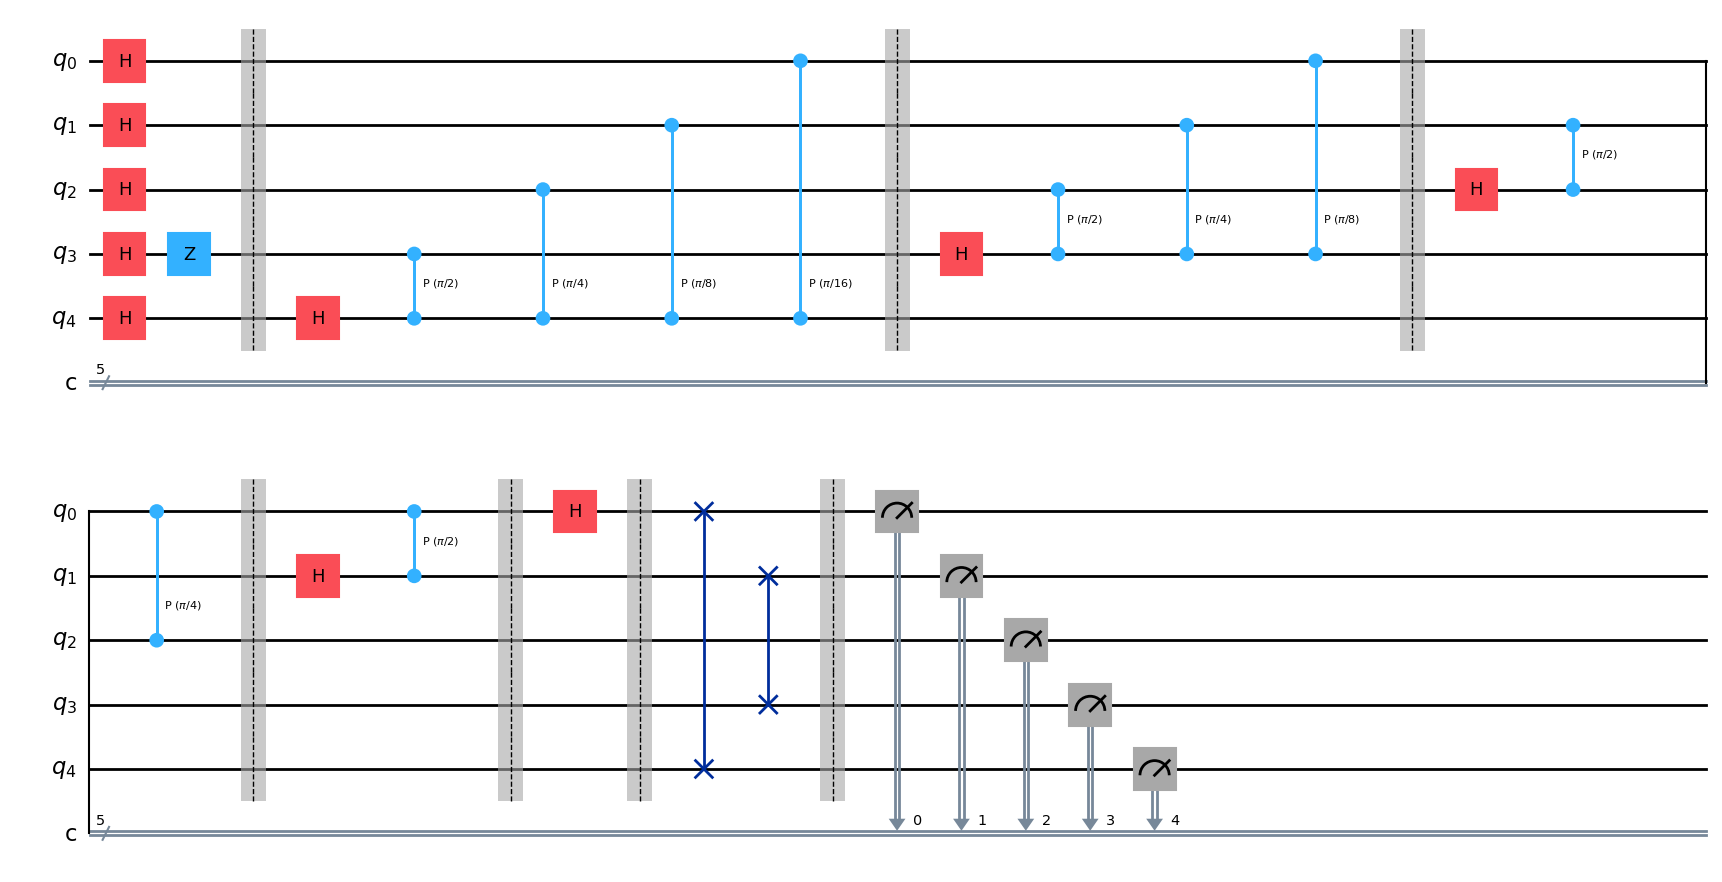

In [8]:
# Calling the function for creating QFT circuit
qft(qc, n_qubits)

# Creating the measurement of qubits
for i in range(n_qubits): 
    qc.measure(i,i)

# Visualizing the circuit
qc.draw(output='mpl', style='iqp')

**Fig 03 : 5 Qubit QFT Quantum Circuit with Z(3)**

The above circuit diagram comprises of following notations and components :

**Circuit Notations :**

- **qo, q1, q2, q3, q4** are the 5 qubits represented by the solid horizontal line.
- **c** is the classical bit after measurement which is represented by the double lines.
- **5/** above the double lines represents the no. of classical data bits measurements.

**Circuit Components :**

- **H** in orange boxes represents the Hadamard gate. 
- **Z** in sky-blue box represents the Z gate.
- **Controlled Phase Rotations** are represented by sky-blue lines.
- **Swap gates** are represented by dark-blue lines with cross.
- **Barrier** denoted by dotted lines separates the different segments of the circuit.
- **Meters** in gray boxes represents the Measurement operation on qubits.

#### iii) QFT Simulation :

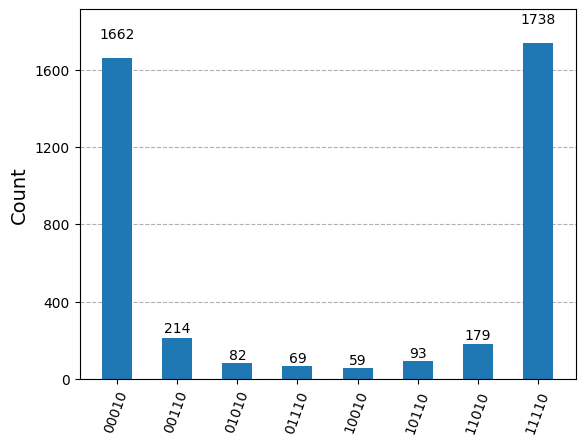

In [9]:
# Getting the simulator
simulator_qft = Aer.get_backend("qasm_simulator")

# Transpile transforms the circuit to something appropriate for the machine
sim_circuit_qft = transpile(qc, backend = simulator_qft)

# The run method in the simulator executes the transpiled circuit.
sim_job_qft = simulator.run(sim_circuit_qft, shots = 4096)

# I am fetching the results of the simulation job execution.
sim_result_qft = sim_job_qft.result()

# I am generating and displaying a histogram of the simulation outcomes.
plot_histogram(sim_result_qft.get_counts())

**Fig 04 : Measured state Vs Counts**

#### iv). Measured Frequency analysis

Expected QFT peak is ∣00010⟩

In the measured case, we observe two dominant peaks instead of one. 

- The expected peak is at 00010 (f1 = 2). **Hence, the measured fundamental frequency is in agreement with expected fundamental frequency.**

- The second peak is at 11110 (30). The second peak happens due to periodicity aliasing in the Discrete Fourier Transform (DFT), which the QFT implements. Due to Nyquist folding, frequencies get reflected back and there is another peak is at 2^5 - 2 = 30 which is 11110. 

- The third harmonic is (3f1 = 6) which is 00110.

- The fifth harmonic (5f1 = 10) which is 01010.

- The seventh harmonic (7f1 = 14) which is 01110.

- The ninth harmonic (9f1 = 18) which is 10010.

- The eleventh harmonic (11f1 = 22) which is 10110.

- The thirteenth harmonic (13f1 = 26) which is 11010.

- The fifteenth harmonic (15f1 = 30) which is 11110. Beyond 15th harmonic, more harmonics will not appear.

**Hence, the measured 3rd, 5th, 7th, 9th, 11th and 13th harmonics are in agreement with expected harmonics.** The 15th harmonic has inflated intensity, due to folding and reflection. 

The intensity of the fundamental is around 83%, the 3rd harmonic intensity is around 9.5%, the 5th harmonic intensity is around 4% and so no, considering the mirror image concept. Hence, the **decay** is prominent.

## Solution to (C) - IBM QC Hardware calculation

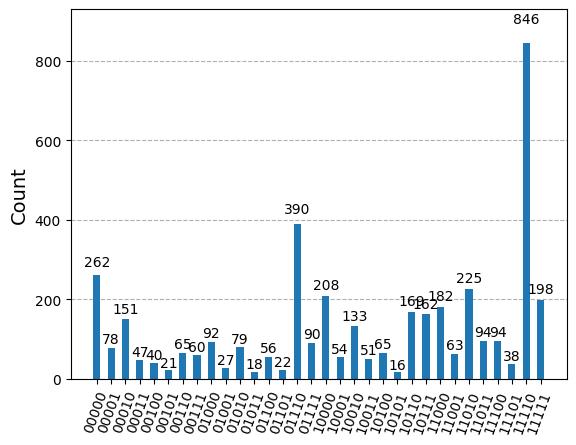

In [10]:
# Connecting with my IBMQ account and use the sevices
service = QiskitRuntimeService()

# Fetch list of all available quantum backends
mybackends = service.backends(operational = True, simulator = False, 
                              min_num_qubits = 5)

# Pick the best available backend
device = service.least_busy(operational = True, simulator = False, 
                            min_num_qubits = 5)

# Transforms my circuit to something appropriate for the hardware
transpiled_circuit = transpile(qc, device, seed_transpiler = 13)

# SamplerV2 is used to find the probabilities of output states
sampler = Sampler(mode = device)

# Executing the transpiled circuit
job_hardware = sampler.run([transpiled_circuit])

# Fetching the results of the sampler job execution.
result_hardware = job_hardware.result()

# the 1st element at 0th index is the public result
pub_result = result_hardware[0]

# Extracting the classical data from the public result
classical_data = pub_result.data.c

# Displaying a histogram of the execution outcomes
plot_histogram(classical_data.get_counts())

#### Hardware result analysis

The histogram represents the probability of measuring the output states when my quantum circuit runs on the IBM QC Hardware.

In the above histogram :
- The **x-axis** represents the measured states.
- The **y-axis** represents the number of times each state was measured.

The circuit ran for 4096 trials on the IBM QC Hardware. 

Here, on the x-axis, there are multiple different measured states with some smaller and some larger counts.

**Hence, the overall hardware result is inconsistent due to noise.**